# MS 263 - Data Analysis

# Final Project notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
from scipy import stats
from SJ_tools import final_proj_functions as fpf
from matplotlib import mlab

/var/folders/9q/f1tj90w176qgctk31mz60mcw0000gn/T/ipykernel_4050/3835688952.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Introduction

Medusazoa is a clade of cnidarian classes which include a medusa stage in their life cycle and includes classes Scyphozoa, the true jellyfish, and Hydrozoa. Both of these classes include genera that are prone to boom and bust cycles. Among the most bloom-forming genera on the eastern Pacific boundary are *Chrysaora* (class Scyphozoa), the sea nettles, *Aurelia* (class Scyphozoa), the moon jellies, and *Aequorea* (class Hydrozoa), the crystal jellies. There is strong support for the hypothesis that environmental factors such as temperature, salinity, and food availability are highly influential on the aggregation tendencies of bloom-forming genera (Goldstein & Steiner 2020, Graham et al. 2001).

Many medusazoan jellies possess metagenic life cycles in which generations alternate between a planktonic medusa stage and a benthic polyp stage. Medusae are gonochoristic and reproduce sexually to release planktonic planula larvae. These planulae settle on the substrate and metamorphose into scyphistomae, which can remain dormant for years (Widmer 2008). When they become active after dormancy, scyphistomae can begin strobilating; strobilation is a process that causes the polyp, now called a strobila, to produce layers of developing ephyra larvae. Once the topmost ephyrae is fully developed, it is released into the water and, over the next four to nine months, depending on the species, develops into a sexually mature medusa (Widmer 2008).
 
There are two defined types of jellyfish blooms that we can observe: true blooms and apparent blooms. True blooms are defined by periods of increased reproductive output, while apparent blooms describe populations that have been redistributed or redispersed (Graham 2001). There exist different hypotheses to explain bloom behavior in the context of both true and apparent blooms. Since jellyfish are planktonic and therefore subject to movement of water masses, apparent blooms are likely caused by currents and upwelling events where changes in density impact where the jellies end up. True blooms, on the other hand, are driven by both physical and biological factors including water temperature, salinity, pH, and food availability (Graham 2001, Treible & Condon 2019). A study by Goldstein and Steiner (2020), found that, under high food availability conditions, Aurelia aurita polyps produced more ephyrae than in low food availability conditions.

Upwelling is a phenomenon that occurs along coastlines when winds push water offshore, causing cold, nutrient rich water to be pushed to the surface. On the west coast of the United States, winter winds blow parallel to the coastline during the winter months, causing upwelling events that bring nutrients such as nitrate and iron to the surface where they are then used by phytoplankton to grow and reproduce, resulting in algal blooms in the spring (Klemas 2012). These blooms become hubs of biological activity, as they support life at all trophic levels. Zooplankton gather to eat the phytoplankton, and jellyfish gather to prey on the zooplankton. It is possible that, if there are scyphistomae near the algal bloom, they may sense the presence of food and begin to strobilate, either resulting in a true bloom four to nine months later, or dispersing to contribute to blooms elsewhere, depending on the movement of the water.

The aim of this study is to identify a link, if one exists, between upwelling events and jellyfish aggregations, either true or apparent as is it incredibly difficult to distinguish between the types of blooms. I will compare the Biologically Effective Upwelling Transport Index (BEUTI index, hereby referred to as BEUTI) to jellyfish abundance data in two regions along the west coast, central California and Oregon/Washington, hereby referred to as Pacific Northwest (PNW). I hypothesize that there will be a lagged correlation between upwelling events and high jellyfish abundance measurements that reflects the lag between upwelling events and algal blooms (5-6 months), as well as the period required for ephyrae to mature into fully grown medusae (4-9 months), therefore I predict the lag time period to be between nine and fourteen months.


# Methods and data sources

### Data sources

The datasets used in this project are NOAA BEUTI index data and jellyfish abundance data from central CA and Oregon/Washington. The BEUTI index is a measure of the nitrate flux (𝜇mol L⁻¹) caused by upwelling events; it measures the concentration of nitrate that is being dragged up by the water. This data was collected by NOAA, and was downloaded from the Environmental Research Data Services (ERD, https://oceanview.pfeg.noaa.gov/products/upwelling/dnld). Jellyfish abundance data (CPUE, ln[catch+1]) was collected as part of the Rockfish Recruitment and Ecosystem Assessment Surveys (RREAS) conducted by NOAA and affiliates. Samples were taken in late May/early June. Data for central CA is available for 1990 to 2015, and PNW data is available for 1999 to 2016. These data were downloaded from the Environmental Research Division's Data Access Program (ERDDAP, https://oceanview.pfeg.noaa.gov/erddap/search/index.html?page=1&itemsPerPage=1000&searchFor=jellyfish+biomass).

### Methods

To accomplish my research goal, I first calculated the relative abundance of each genus for both regions. Then, I ran a two sample t test on the overall abundance of jellyfish between the two regions using the scipy.stats package. I used a Shapiro-Wilk test for normality and calculated the variances. Because the jellyfish data are not normally distributed (except the *Aequorea* abundance data) and the variances are unequal, I ran a Welch ANOVA to compare genera abundances. Welch’s ANOVA is robust to deviations from Gaussian distribution and does not assume equal variances. It does, however, assume that sample sizes are approximately equal; the central CA jellyfish abundance data has 26 samples and the PNW data has 17 samples. This combined with the small sample sizes of the datasets impacts the statistical power of this analysis, which is important to consider when drawing conclusions. Next, I calculated the correlation coefficients between abundances of each genus and each month of BEUTI data to assess relationships between jellyfish abundance and upwelling events that occurred during different months. After using the Matplotlib package to plot these correlations, I selected four months in which the response to upwelling events differed between regions, and plotted cross correlations for these months, using the Matplotlib.xcorr function, to examine these relationships further.

# Results

#### Read in the jellyfish abundance data

In [2]:
file_path = '/Users/sarah/Documents/MLML/Current_classes/MS263-Data_Analysis/Final_project/data/MS263 jelly data.csv'
jellydf = pd.read_csv(file_path,header=1)

In [3]:
jellydf

,year,genus,region,abundance
0,1990,Chrysaora CA,central CA,0.247798
1,1991,Chrysaora CA,central CA,0.282914
2,1992,Chrysaora CA,central CA,1.382158
3,1993,Chrysaora CA,central CA,0.531131
4,1994,Chrysaora CA,central CA,0.468061
...,...,...,...,...
83,2012,Chrysaora PNW,PNW,7.425420
84,2013,Chrysaora PNW,PNW,8.488680
85,2014,Chrysaora PNW,PNW,7.848780
86,2015,Chrysaora PNW,PNW,0.266031


#### Subset the data by genus

In [4]:
chrysaora_ca = jellydf[(jellydf['genus'] == 'Chrysaora CA')& (jellydf['region'] == 'central CA')]
chrysaora_pnw = jellydf[(jellydf['genus'] == 'Chrysaora PNW') & (jellydf['region'] == 'PNW')]
aurelia = jellydf[(jellydf['genus'] == 'Aurelia')]
aequorea = jellydf[(jellydf['genus'] == 'Aequorea')]

#### Calculate time series trend lines

In [5]:
#chrysaora_ca trend line
p = np.polyfit(chrysaora_ca['year'], chrysaora_ca['abundance'], 1)
slope = p[0]
intercept = p[1]
chry_bestfit = slope * chrysaora_ca['year'] + intercept
# chry_bestfit
print(slope)

-0.005468419531624213


In [6]:
#chrysaora_pnw trend line
p = np.polyfit(chrysaora_pnw['year'], chrysaora_pnw['abundance'], 1)
chry_pnw_slope = p[0]
chry_pnw_intercept = p[1]
chry_pnw_bestfit = chry_pnw_slope * chrysaora_pnw['year'] + chry_pnw_intercept
# chry_bestfit
print(chry_pnw_slope)

-0.16349746054694259


In [7]:
# aequorea trend line
aq_p = np.polyfit(aequorea['year'], aequorea['abundance'], 1)
aq_slope = aq_p[0]
aq_intercept = aq_p[1]
aequo_bestfit = aq_slope * aequorea['year'] + aq_intercept
print(aq_slope)

-0.023060338463370522


In [8]:
# aurelia trend line
aur_p = np.polyfit(aurelia['year'], aurelia['abundance'], 1)
aur_slope = aur_p[0]
aur_intercept = aur_p[1]
aurelia_bestfit = aur_slope * aurelia['year'] + aur_intercept
print(aur_slope)

0.000182606998290419


#### Plot the jelly abundance time series

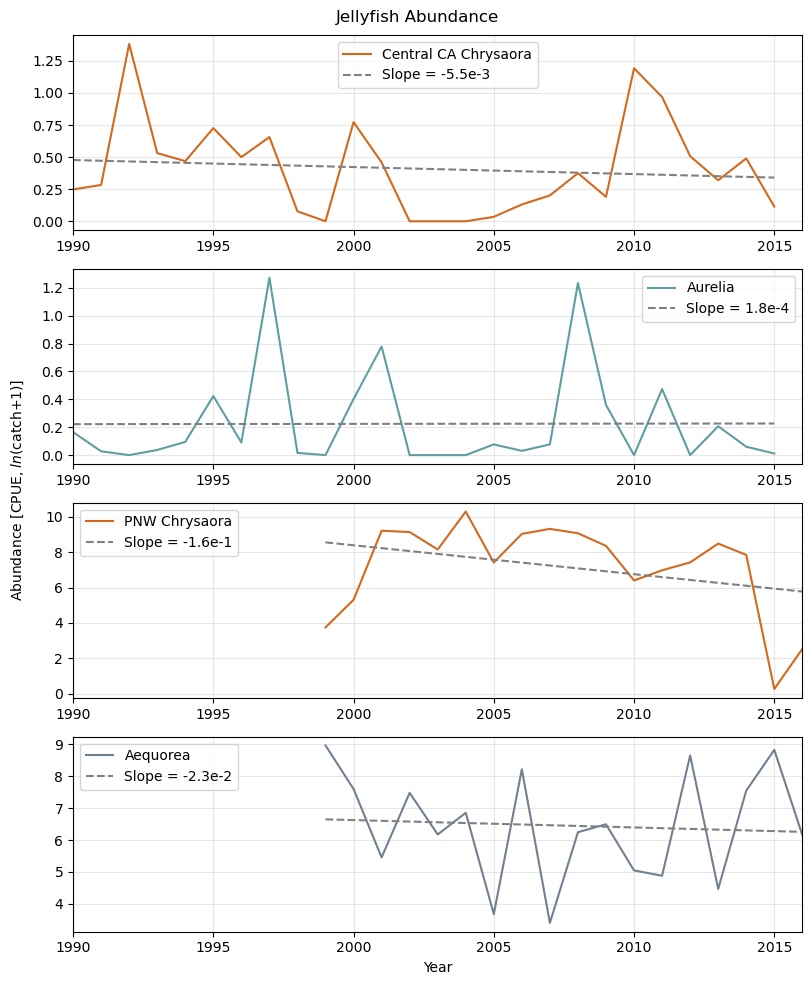

In [9]:
fig, axes = plt.subplots(4, 1, figsize=(8, 10))

#ca chrysaora
axes[0].plot(chrysaora_ca['year'], chrysaora_ca['abundance'], 'chocolate', label='Central CA Chrysaora')
axes[0].plot(chrysaora_ca['year'], chry_bestfit, 'grey', linestyle='--', label='Slope = -5.5e-3')
axes[0].set_xlim([1990, 2016])

#aurelia
axes[1].plot(aurelia['year'], aurelia['abundance'], 'cadetblue', label='Aurelia')
axes[1].plot(aurelia['year'], aurelia_bestfit, 'grey', linestyle='--', label='Slope = 1.8e-4')
axes[1].set_xlim([1990, 2016])

# pnw chrysaora
axes[2].plot(chrysaora_pnw['year'], chrysaora_pnw['abundance'], 'chocolate', label='PNW Chrysaora')
axes[2].plot(chrysaora_pnw['year'], chry_pnw_bestfit, 'grey', linestyle='--', label='Slope = -1.6e-1')
axes[2].set_xlim([1990, 2016])

# aequorea
axes[3].plot(aequorea['year'], aequorea['abundance'], 'slategray', label='Aequorea')
axes[3].plot(aequorea['year'], aequo_bestfit, 'grey', linestyle='--', label='Slope = -2.3e-2')
axes[3].set_xlim([1990, 2016])

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')
axes[3].legend(loc='best')

axes[0].grid(alpha=0.3)
axes[1].grid(alpha=0.3)
axes[2].grid(alpha=0.3)
axes[3].grid(alpha=0.3)

fig.suptitle('Jellyfish Abundance')
plt.xlabel('Year')
# axes[1].set_ylabel('Abundance [CPUE, ln(catch+1)]')
# follwing line written with help from user wwliao on StackOverflow
fig.text(0.001, 0.5, 'Abundance [CPUE, $ln$(catch+1)]', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

**Figure 1.** Time series of jellyfish abundance data from two regions along the US west coast. Central CA genera are Chrysaora and Aurelia; PNW genera are Chrysaora and Aequorea. Central CA data were collected for 1990-2015 and PNW data were collected for 1999-2016, samples collected in late May/early June. Abundance is reported as catch per unit effort (CPUE).

#### Calculate relative genus abundance for central CA

In [10]:
central_ca = jellydf[jellydf['region'] == 'central CA']
pnw = jellydf[jellydf['region'] == 'PNW']

In [11]:
# richness = 2
N_ca = np.sum(central_ca['abundance']) #total biomass of both genera
ni_chry_ca = np.sum(chrysaora_ca['abundance']) #total biomass of target genus
ni_aurelia = np.sum(aurelia['abundance'])

In [12]:
chry_relab_ca = fpf.relative_abundance(N_ca, ni_chry_ca)
aurelia_rel_ab = fpf.relative_abundance(N_ca, ni_aurelia)

#### Calulate relative genus abundance for PNW

In [13]:
N_pnw = np.sum(pnw['abundance']) #total biomass of all 3 genera
ni_chry_pnw = np.sum(chrysaora_pnw['abundance']) #total biomass of target genus
ni_aequo = np.sum(aequorea['abundance'])

In [14]:
chry_relab_pnw = fpf.relative_abundance(N_pnw, ni_chry_pnw)
aequo_rel_ab = fpf.relative_abundance(N_pnw, ni_aequo)

#### Calculate standard error for all genera

In [15]:
relative_abundance = [chry_relab_ca, aurelia_rel_ab, chry_relab_pnw, aequo_rel_ab]
genera = ['CA Chrysaora', 'Aurelia', 'PNW Chrysaora', 'Aequorea']

In [16]:
N_total = len(jellydf['abundance'])
std = np.std(relative_abundance)
error = std/np.sqrt(N_total)

#### Plot relative genus abundance

In [17]:
x_aur = [2]
y_aur = [aurelia_rel_ab]

x_chry = [3,6]
y_chry = [chry_relab_ca, chry_relab_pnw]

x_aeq = [5]
y_aeq = [aequo_rel_ab]

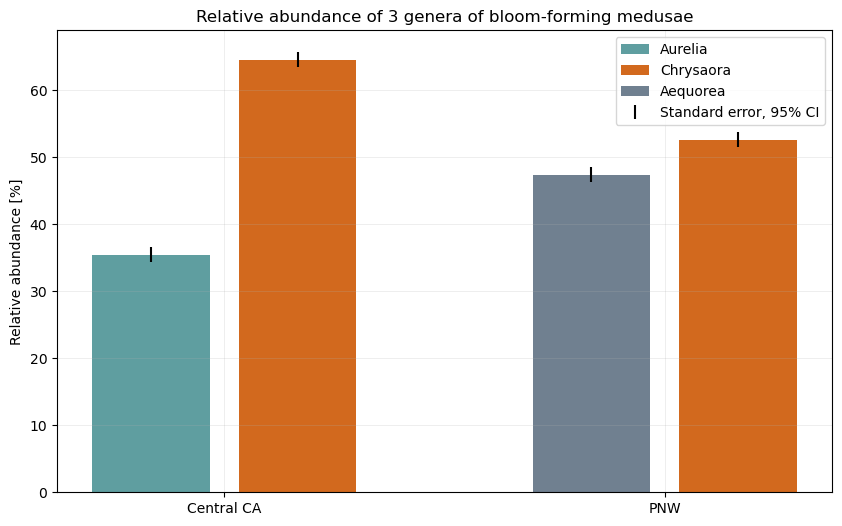

In [18]:
plt.figure(figsize=(10,6))

plt.bar(x_aur, y_aur, label='Aurelia', color='cadetblue')
plt.bar(x_chry, y_chry, label='Chrysaora', color='chocolate')
plt.bar(x_aeq, y_aeq, label='Aequorea', color='slategray')
plt.errorbar([3,2,6,5], relative_abundance, yerr=error, fmt='none', color='k', label='Standard error, 95% CI')
plt.gca().set_xticks([2.5,5.5])
plt.gca().set_xticklabels(['Central CA', 'PNW'])
plt.ylabel('Relative abundance [%]')
plt.grid(linewidth=0.5, alpha=0.3)
plt.legend(loc='best')
plt.title('Relative abundance of 3 genera of bloom-forming medusae')
plt.show()

**Figure 2.** Relative abundance of each genera in both regions, calculated separately; CA Chrysaora and Aurelia were compared to each other, and PNW Chrysaora and Aequorea were compared to each other. In central CA, Chrysaora is 64.5% and Aurelia is 35.5% of the population. In the PNW, Chrysaora is 52.6% and Aequorea is 47.4% of the population. Error was calculated using a 95% confidence interval and plotted.

In [19]:
# t test to see if there is a difference in overall jelly abundance between the two regions
region_ttest = stats.ttest_ind(central_ca['abundance'], pnw['abundance'], equal_var=False) 
region_ttest

TtestResult(statistic=-17.304051439830847, pvalue=3.88438927165647e-19, df=36.36362449080731)

The p-value is less than alpha with a 95% confidence interval, so we rejct the null hypothesis of no difference between the overall region jelly abundances.

In [20]:
# check for normality and equal variances
# normality - use Shapiro-Wilk test
tstat_cachry, pvalue_cachry = stats.shapiro(chrysaora_ca['abundance'])
tstat_aurelia, pvalue_aurelia = stats.shapiro(aurelia['abundance'])
tstat_pnwchry, pvalue_pnwchry = stats.shapiro(chrysaora_pnw['abundance'])
tstat_aequo, pvalue_aequo = stats.shapiro(aequorea['abundance'])

if pvalue_cachry > 0.05:
    print('CA Chrysaora abundance is normally distributed')
else:
    print('CA Chrysaora abundance is NOT normally distributed')
    
if pvalue_aurelia > 0.05:
    print('Aurelia abundance is normally distributed')
else:
    print('Aurelia abundance is NOT normally distributed')
    
if pvalue_pnwchry > 0.05:
    print('PNW Chrysaora abundance is normally distributed')
else:
    print('PNW Chrysaora abundance is NOT normally distributed')
    
if pvalue_aequo > 0.05:
    print('Aequorea abundance is normally distributed')
else:
    print('Aequorea abundance is NOT normally distributed')

# calculate variances
var_ca_chry = np.var(chrysaora_ca['abundance'])
var_aurelia = np.var(aurelia['abundance'])
var_pnw_chry = np.var(chrysaora_pnw['abundance'])
var_aequo = np.var(aequorea['abundance'])
print('CA Chrysaora var:'+str(var_ca_chry))
print('Aurelia var:'+str(var_aurelia))
print('PNW Chrysaora var:'+str(var_pnw_chry))
print('Aequorea var:'+str(var_aequo))

CA Chrysaora abundance is NOT normally distributed
Aurelia abundance is NOT normally distributed
PNW Chrysaora abundance is NOT normally distributed
Aequorea abundance is normally distributed
CA Chrysaora var:0.13218589800633943
Aurelia var:0.124554273804289
PNW Chrysaora var:6.625184653234492
Aequorea var:2.787270697668261


In [21]:
# anova
genus_anova, genus_posthoc = fpf.jelly_anova(jellydf)
genus_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,genus,3,36.764356,111.305814,1.675027e-18,0.836648


There is a significant difference between abundances of each genus, so I will now run a non-parametric post-hoc test to find where those difference(s) are.

In [22]:
genus_posthoc

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Aequorea,Aurelia,6.451978,0.224583,6.227395,0.443959,14.026962,2.153833e-14,5.423130
1,Aequorea,Chrysaora CA,6.451978,0.408672,6.043306,0.443959,13.612310,2.153833e-14,5.253068
2,Aequorea,Chrysaora PNW,6.451978,7.167618,-0.715640,0.482634,-1.482780,4.523729e-01,-0.313463
3,Aurelia,Chrysaora CA,0.224583,0.408672,-0.184089,0.401576,-0.458416,9.678016e-01,-0.496229
4,Aurelia,Chrysaora PNW,0.224583,7.167618,-6.943035,0.443959,-15.638915,2.153833e-14,-3.992528
5,Chrysaora CA,Chrysaora PNW,0.408672,7.167618,-6.758946,0.443959,-15.224262,2.153833e-14,-3.883525


#### Read in the BEUTI data

In [23]:
file_path2 = '/Users/sarah/Documents/MLML/Current_classes/MS263-Data_Analysis/Final_project/data/BEUTI_monthly.csv'
beutidf = pd.read_csv(file_path2,header=0)
beutidf['date'] = beutidf['month'].astype(str) + '-' + beutidf['year'].astype(str)
beutidf['date'] = pd.to_datetime(beutidf['date'])

/var/folders/9q/f1tj90w176qgctk31mz60mcw0000gn/T/ipykernel_4050/3398745545.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  beutidf['date'] = pd.to_datetime(beutidf['date'])


In [24]:
# subset - only need years 1990-2016 and latitudes 36 and 46? what is best to represent pnw?
ii = ((beutidf['year'] >= 1990) & (beutidf['year'] <= 2016))
beuti_sub = beutidf[ii]
beuti_sub = beuti_sub.iloc[:, [19,0,1,7,17]]
beuti_sub

,date,year,month,36N,46N
24,1990-01-01,1990,1,3.568,-0.821
25,1990-02-01,1990,2,5.526,2.073
26,1990-03-01,1990,3,10.714,1.928
27,1990-04-01,1990,4,8.017,1.710
28,1990-05-01,1990,5,4.836,1.202
...,...,...,...,...,...
343,2016-08-01,2016,8,2.942,0.827
344,2016-09-01,2016,9,2.436,0.713
345,2016-10-01,2016,10,1.251,-0.020
346,2016-11-01,2016,11,1.042,0.000


36N will be used for central ca and 46N for pnw

### Cross correlation of jelly blooms with BEUTI index

Visualize the time series of nitrate flux recorded in the BEUTI index

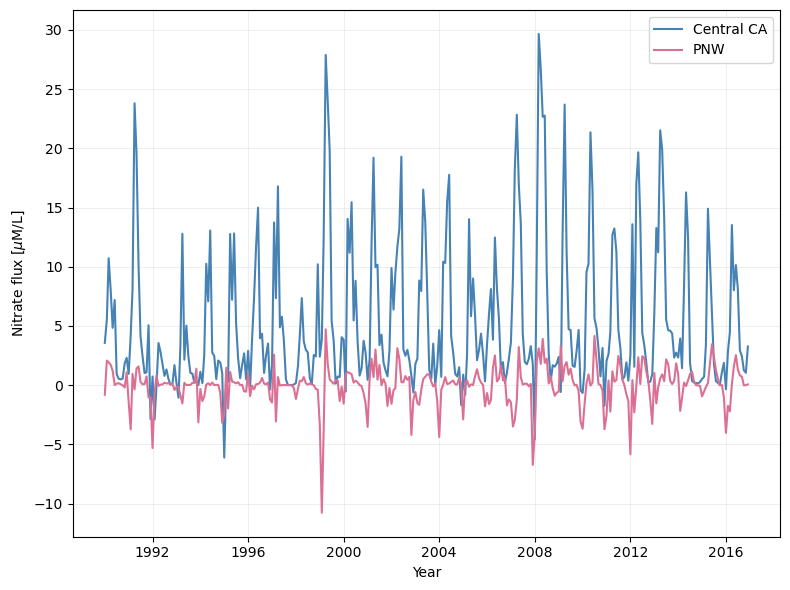

In [25]:
plt.figure(figsize=(8,6))

plt.plot(beuti_sub['date'], beuti_sub['36N'], color='steelblue', label='Central CA')
plt.plot(beuti_sub['date'], beuti_sub['46N'], color='palevioletred', label='PNW')
plt.xlabel('Year')
plt.ylabel('Nitrate flux [$\mu$M/L]')
plt.legend(loc='best')
plt.grid(linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

**Figure 3.** Time series of BEUTI index data. Regions are plotted separately; 36N latitude was used for central CA and 46N latitude was used for PNW. Central CA nitrate flux is significantly higher throughout the sampling period, indicating stronger nitrate flux during upwelling events which occur on seasonal cycles.

#### Calculate correlations between each jelly abundance data point and each month of nitrate flux data

In [26]:
date_array = np.array(beuti_sub['date']).flatten()
date_array = date_array.astype(int)

beuti_array_ca = np.array([beuti_sub['36N']]).flatten()
beuti_array_ca = beuti_array_ca.astype(float)

beuti_array_pnw = np.array([beuti_sub['46N']]).flatten()
beuti_array_pnw = beuti_array_pnw.astype(float)

In [27]:
# subset so that jelly and beuti data are equal length
# separate ones for ca and pnw since sample dates are different
# one for every month

# january
jan_pnw = ((beuti_sub['month']==1) & (beuti_sub['year']>=1999))
beuti_jan_pnw = beuti_sub[jan_pnw]
beuti_jan_pnw = np.array(beuti_jan_pnw.iloc[:,[3]].astype(float)).flatten()

jan_ca = (beuti_sub['month']==1) & (beuti_sub['year']<=2015)
beuti_jan_ca = beuti_sub[jan_ca]
beuti_jan_ca = np.array(beuti_jan_ca.iloc[:,[3]].astype(float)).flatten()

# february
feb_pnw = ((beuti_sub['month']==2) & (beuti_sub['year']>=1999))
beuti_feb_pnw = beuti_sub[feb_pnw]
beuti_feb_pnw = np.array(beuti_feb_pnw.iloc[:,[3]].astype(float)).flatten()

feb_ca = (beuti_sub['month']==2) & (beuti_sub['year']<=2015)
beuti_feb_ca = beuti_sub[feb_ca]
beuti_feb_ca = np.array(beuti_feb_ca.iloc[:,[3]].astype(float)).flatten()

# march
mar_pnw = ((beuti_sub['month']==3) & (beuti_sub['year']>=1999))
beuti_mar_pnw = beuti_sub[mar_pnw]
beuti_mar_pnw = np.array(beuti_mar_pnw.iloc[:,[3]].astype(float)).flatten()

mar_ca = (beuti_sub['month']==3) & (beuti_sub['year']<=2015)
beuti_mar_ca = beuti_sub[mar_ca]
beuti_mar_ca = np.array(beuti_mar_ca.iloc[:,[3]].astype(float)).flatten()

# april
apr_pnw = ((beuti_sub['month']==4) & (beuti_sub['year']>=1999))
beuti_apr_pnw = beuti_sub[apr_pnw]
beuti_apr_pnw = np.array(beuti_apr_pnw.iloc[:,[3]].astype(float)).flatten()

apr_ca = (beuti_sub['month']==4) & (beuti_sub['year']<=2015)
beuti_apr_ca = beuti_sub[apr_ca]
beuti_apr_ca = np.array(beuti_apr_ca.iloc[:,[3]].astype(float)).flatten()

# may
may_pnw = ((beuti_sub['month']==5) & (beuti_sub['year']>=1999))
beuti_may_pnw = beuti_sub[may_pnw]
beuti_may_pnw = np.array(beuti_may_pnw.iloc[:,[3]].astype(float)).flatten()

may_ca = (beuti_sub['month']==5) & (beuti_sub['year']<=2015)
beuti_may_ca = beuti_sub[may_ca]
beuti_may_ca = np.array(beuti_may_ca.iloc[:,[3]].astype(float)).flatten()

# june
june_pnw = ((beuti_sub['month']==6) & (beuti_sub['year']>=1999))
beuti_june_pnw = beuti_sub[june_pnw]
beuti_june_pnw = np.array(beuti_june_pnw.iloc[:,[3]].astype(float)).flatten()

june_ca = (beuti_sub['month']==6) & (beuti_sub['year']<=2015)
beuti_june_ca = beuti_sub[june_ca]
beuti_june_ca = np.array(beuti_june_ca.iloc[:,[3]].astype(float)).flatten()

# july
jul_pnw = ((beuti_sub['month']==7) & (beuti_sub['year']>=1999))
beuti_jul_pnw = beuti_sub[jul_pnw]
beuti_jul_pnw = np.array(beuti_jul_pnw.iloc[:,[3]].astype(float)).flatten()

jul_ca = (beuti_sub['month']==7) & (beuti_sub['year']<=2015)
beuti_jul_ca = beuti_sub[jul_ca]
beuti_jul_ca = np.array(beuti_jul_ca.iloc[:,[3]].astype(float)).flatten()

# august
aug_pnw = ((beuti_sub['month']==8) & (beuti_sub['year']>=1999))
beuti_aug_pnw = beuti_sub[aug_pnw]
beuti_aug_pnw = np.array(beuti_aug_pnw.iloc[:,[3]].astype(float)).flatten()

aug_ca = (beuti_sub['month']==8) & (beuti_sub['year']<=2015)
beuti_aug_ca = beuti_sub[aug_ca]
beuti_aug_ca = np.array(beuti_aug_ca.iloc[:,[3]].astype(float)).flatten()

# september
sep_pnw = ((beuti_sub['month']==9) & (beuti_sub['year']>=1999))
beuti_sep_pnw = beuti_sub[sep_pnw]
beuti_sep_pnw = np.array(beuti_sep_pnw.iloc[:,[3]].astype(float)).flatten()

sep_ca = (beuti_sub['month']==9) & (beuti_sub['year']<=2015)
beuti_sep_ca = beuti_sub[sep_ca]
beuti_sep_ca = np.array(beuti_sep_ca.iloc[:,[3]].astype(float)).flatten()

# october
oct_pnw = ((beuti_sub['month']==10) & (beuti_sub['year']>=1999))
beuti_oct_pnw = beuti_sub[oct_pnw]
beuti_oct_pnw = np.array(beuti_oct_pnw.iloc[:,[3]].astype(float)).flatten()

oct_ca = (beuti_sub['month']==10) & (beuti_sub['year']<=2015)
beuti_oct_ca = beuti_sub[oct_ca]
beuti_oct_ca = np.array(beuti_oct_ca.iloc[:,[3]].astype(float)).flatten()

# november
nov_pnw = ((beuti_sub['month']==11) & (beuti_sub['year']>=1999))
beuti_nov_pnw = beuti_sub[nov_pnw]
beuti_nov_pnw = np.array(beuti_nov_pnw.iloc[:,[3]].astype(float)).flatten()

nov_ca = (beuti_sub['month']==11) & (beuti_sub['year']<=2015)
beuti_nov_ca = beuti_sub[nov_ca]
beuti_nov_ca = np.array(beuti_nov_ca.iloc[:,[3]].astype(float)).flatten()

# december
dec_pnw = ((beuti_sub['month']==12) & (beuti_sub['year']>=1999))
beuti_dec_pnw = beuti_sub[dec_pnw]
beuti_dec_pnw = np.array(beuti_dec_pnw.iloc[:,[3]].astype(float)).flatten()

dec_ca = (beuti_sub['month']==12) & (beuti_sub['year']<=2015)
beuti_dec_ca = beuti_sub[dec_ca]
beuti_dec_ca = np.array(beuti_dec_ca.iloc[:,[3]].astype(float)).flatten()

In [28]:
chrysaora_ca_abundance = chrysaora_ca['abundance']
aurelia_abundance = aurelia['abundance']
chrysaora_pnw_abundance = chrysaora_pnw['abundance']
aequorea_abundance = aequorea['abundance']

Compute R$^2$ values for each month of BEUTI data

In [29]:
# january
jan_cachry_r = fpf.calc_correlations(beuti_jan_ca, chrysaora_ca_abundance)
jan_aur_r = fpf.calc_correlations(beuti_jan_ca, aurelia_abundance)
jan_pnwchry_r = fpf.calc_correlations(beuti_jan_pnw, chrysaora_pnw_abundance)
jan_aeq_r = fpf.calc_correlations(beuti_jan_pnw, aequorea_abundance)

# february
feb_cachry_r = fpf.calc_correlations(beuti_feb_ca, chrysaora_ca_abundance)
feb_aur_r = fpf.calc_correlations(beuti_feb_ca, aurelia_abundance)
feb_pnwchry_r = fpf.calc_correlations(beuti_feb_pnw, chrysaora_pnw_abundance)
feb_aeq_r = fpf.calc_correlations(beuti_feb_pnw, aequorea_abundance)

# march
mar_cachry_r = fpf.calc_correlations(beuti_mar_ca, chrysaora_ca_abundance)
mar_aur_r = fpf.calc_correlations(beuti_mar_ca, aurelia_abundance)
mar_pnwchry_r = fpf.calc_correlations(beuti_mar_pnw, chrysaora_pnw_abundance)
mar_aeq_r = fpf.calc_correlations(beuti_mar_pnw, aequorea_abundance)

# april
apr_cachry_r = fpf.calc_correlations(beuti_apr_ca, chrysaora_ca_abundance)
apr_aur_r = fpf.calc_correlations(beuti_apr_ca, aurelia_abundance)
apr_pnwchry_r = fpf.calc_correlations(beuti_apr_pnw, chrysaora_pnw_abundance)
apr_aeq_r = fpf.calc_correlations(beuti_apr_pnw, aequorea_abundance)

# may
may_cachry_r = fpf.calc_correlations(beuti_may_ca, chrysaora_ca_abundance)
may_aur_r = fpf.calc_correlations(beuti_may_ca, aurelia_abundance)
may_pnwchry_r = fpf.calc_correlations(beuti_may_pnw, chrysaora_pnw_abundance)
may_aeq_r = fpf.calc_correlations(beuti_may_pnw, aequorea_abundance)

# june
june_cachry_r = fpf.calc_correlations(beuti_june_ca, chrysaora_ca_abundance)
june_aur_r = fpf.calc_correlations(beuti_june_ca, aurelia_abundance)
june_pnwchry_r = fpf.calc_correlations(beuti_june_pnw, chrysaora_pnw_abundance)
june_aeq_r = fpf.calc_correlations(beuti_june_pnw, aequorea_abundance)

# july
jul_cachry_r = fpf.calc_correlations(beuti_jul_ca, chrysaora_ca_abundance)
jul_aur_r = fpf.calc_correlations(beuti_jul_ca, aurelia_abundance)
jul_pnwchry_r = fpf.calc_correlations(beuti_jul_pnw, chrysaora_pnw_abundance)
jul_aeq_r = fpf.calc_correlations(beuti_jul_pnw, aequorea_abundance)

# august
aug_cachry_r = fpf.calc_correlations(beuti_aug_ca, chrysaora_ca_abundance)
aug_aur_r = fpf.calc_correlations(beuti_aug_ca, aurelia_abundance)
aug_pnwchry_r = fpf.calc_correlations(beuti_aug_pnw, chrysaora_pnw_abundance)
aug_aeq_r = fpf.calc_correlations(beuti_aug_pnw, aequorea_abundance)

# september
sep_cachry_r = fpf.calc_correlations(beuti_sep_ca, chrysaora_ca_abundance)
sep_aur_r = fpf.calc_correlations(beuti_sep_ca, aurelia_abundance)
sep_pnwchry_r = fpf.calc_correlations(beuti_sep_pnw, chrysaora_pnw_abundance)
sep_aeq_r = fpf.calc_correlations(beuti_sep_pnw, aequorea_abundance)

# october
oct_cachry_r = fpf.calc_correlations(beuti_oct_ca, chrysaora_ca_abundance)
oct_aur_r = fpf.calc_correlations(beuti_oct_ca, aurelia_abundance)
oct_pnwchry_r = fpf.calc_correlations(beuti_oct_pnw, chrysaora_pnw_abundance)
oct_aeq_r = fpf.calc_correlations(beuti_oct_pnw, aequorea_abundance)

# november
nov_cachry_r = fpf.calc_correlations(beuti_nov_ca, chrysaora_ca_abundance)
nov_aur_r = fpf.calc_correlations(beuti_nov_ca, aurelia_abundance)
nov_pnwchry_r = fpf.calc_correlations(beuti_nov_pnw, chrysaora_pnw_abundance)
nov_aeq_r = fpf.calc_correlations(beuti_nov_pnw, aequorea_abundance)

# december
dec_cachry_r = fpf.calc_correlations(beuti_dec_ca, chrysaora_ca_abundance)
dec_aur_r = fpf.calc_correlations(beuti_dec_ca, aurelia_abundance)
dec_pnwchry_r = fpf.calc_correlations(beuti_dec_pnw, chrysaora_pnw_abundance)
dec_aeq_r = fpf.calc_correlations(beuti_dec_pnw, aequorea_abundance)

Put the R$^2$ values into lists and plot them

In [30]:
ca_chry_r2s = [jan_cachry_r, feb_cachry_r, mar_cachry_r, apr_cachry_r, may_cachry_r, june_cachry_r,
               jul_cachry_r, aug_cachry_r, sep_cachry_r, oct_cachry_r, nov_cachry_r, dec_cachry_r]
aur_r2s = [jan_aur_r, feb_aur_r, mar_aur_r, apr_aur_r, may_aur_r, june_aur_r,
               jul_aur_r, aug_aur_r, sep_aur_r, oct_aur_r, nov_aur_r, dec_aur_r]
pnw_chry_r2s = [jan_pnwchry_r, feb_pnwchry_r, mar_pnwchry_r, apr_pnwchry_r, may_pnwchry_r, june_pnwchry_r,
               jul_pnwchry_r, aug_pnwchry_r, sep_pnwchry_r, oct_pnwchry_r, nov_pnwchry_r, dec_pnwchry_r]
aeq_r2s = [jan_aeq_r, feb_aeq_r, mar_aeq_r, apr_aeq_r, may_aeq_r, june_aeq_r,
               jul_aeq_r, aug_aeq_r, sep_aeq_r, oct_aeq_r, nov_aeq_r, dec_aeq_r]

In [31]:
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

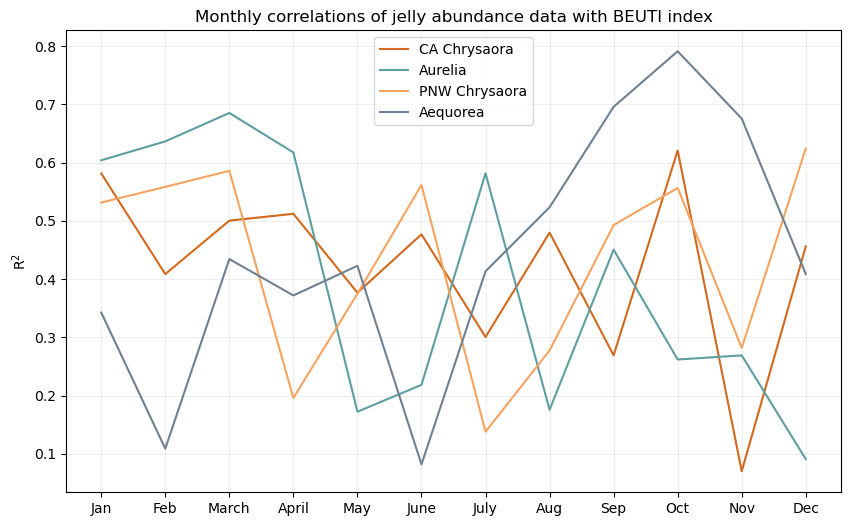

In [32]:
plt.figure(figsize=(10,6))

plt.plot(months, ca_chry_r2s, color='chocolate', label='CA Chrysaora')
plt.plot(months, aur_r2s, color='cadetblue', label='Aurelia')
plt.plot(months, pnw_chry_r2s, color='sandybrown', label='PNW Chrysaora')
plt.plot(months, aeq_r2s, color='slategray', label='Aequorea')
plt.title('Monthly correlations of jelly abundance data with BEUTI index')
plt.ylabel('R$^2$')
plt.grid(linewidth=0.5, alpha=0.3)
plt.legend(loc='best')
plt.show()

**Figure 4.** Correlation coefficients were calculated between each genera for each year of jellyfish data (taken in late May/early June of each year) and the nitrate flux for each month to assess the impact of each month's upwelling events on jellyfish abundance. These coefficients were squared to understand the proportion of variance in the dependent variable (jellyfish abundance) that can potentially be explained by the independent variable (nitrate flux).

#### Plot the notable cross correlations

In [35]:
%matplotlib widget

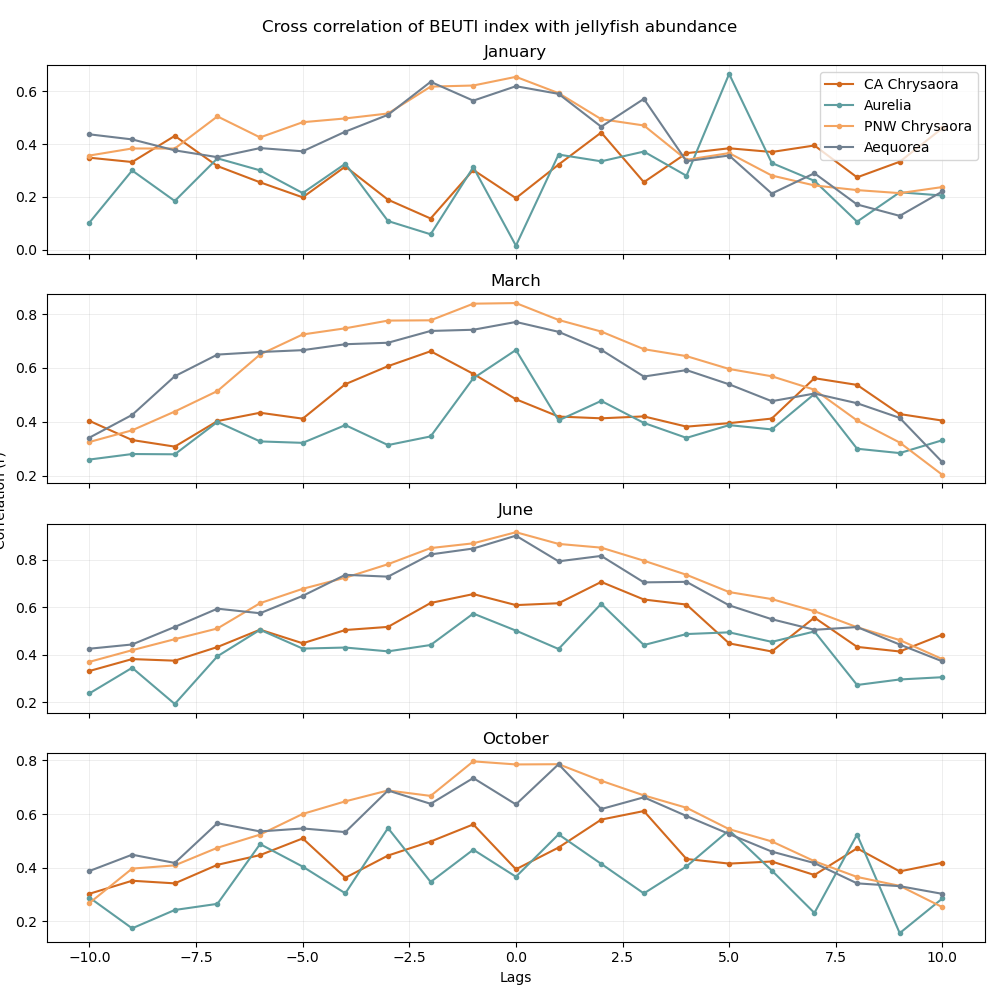

In [36]:
fig, axes = plt.subplots(4,1, figsize=(10,10))

# jan
axes[0].xcorr(beuti_jan_ca, chrysaora_ca_abundance, usevlines=False, linestyle='-',
         markersize=3, color='chocolate', label='CA Chrysaora')
axes[0].xcorr(beuti_jan_ca, aurelia_abundance, usevlines=False, linestyle='-',
         markersize=3, color='cadetblue', label='Aurelia')
axes[0].xcorr(beuti_jan_pnw, chrysaora_pnw_abundance, usevlines=False, linestyle='-',
         markersize=3, color='sandybrown', label='PNW Chrysaora')
axes[0].xcorr(beuti_jan_pnw, aequorea_abundance, usevlines=False, linestyle='-',
         markersize=3, color='slategray', label='Aequorea')
axes[0].set_title('January')
axes[0].legend(loc='best')
axes[0].grid(linewidth=0.5, alpha=0.3)
axes[0].set_xticklabels([])

# march
axes[1].xcorr(beuti_mar_ca, chrysaora_ca_abundance, usevlines=False, linestyle='-',
         markersize=3, color='chocolate', label='CA Chrysaora')
axes[1].xcorr(beuti_mar_ca, aurelia_abundance, usevlines=False, linestyle='-',
         markersize=3, color='cadetblue', label='Aurelia')
axes[1].xcorr(beuti_mar_pnw, chrysaora_pnw_abundance, usevlines=False, linestyle='-',
         markersize=3, color='sandybrown', label='PNW Chrysaora')
axes[1].xcorr(beuti_mar_pnw, aequorea_abundance, usevlines=False, linestyle='-',
         markersize=3, color='slategray', label='Aequorea')
axes[1].set_title('March')
axes[1].grid(linewidth=0.5, alpha=0.3)
axes[1].set_xticklabels([])

# june
axes[2].xcorr(beuti_june_ca, chrysaora_ca_abundance, usevlines=False, linestyle='-',
         markersize=3, color='chocolate', label='CA Chrysaora')
axes[2].xcorr(beuti_june_ca, aurelia_abundance, usevlines=False, linestyle='-',
         markersize=3, color='cadetblue', label='Aurelia')
axes[2].xcorr(beuti_june_pnw, chrysaora_pnw_abundance, usevlines=False, linestyle='-',
         markersize=3, color='sandybrown', label='PNW Chrysaora')
axes[2].xcorr(beuti_june_pnw, aequorea_abundance, usevlines=False, linestyle='-',
         markersize=3, color='slategray', label='Aequorea')
axes[2].set_title('June')
axes[2].grid(linewidth=0.5, alpha=0.3)
axes[2].set_xticklabels([])

# oct
axes[3].xcorr(beuti_oct_ca, chrysaora_ca_abundance, usevlines=False, linestyle='-',
         markersize=3, color='chocolate', label='CA Chrysaora')
axes[3].xcorr(beuti_oct_ca, aurelia_abundance, usevlines=False, linestyle='-',
         markersize=3, color='cadetblue', label='Aurelia')
axes[3].xcorr(beuti_oct_pnw, chrysaora_pnw_abundance, usevlines=False, linestyle='-',
         markersize=3, color='sandybrown', label='PNW Chrysaora')
axes[3].xcorr(beuti_oct_pnw, aequorea_abundance, usevlines=False, linestyle='-',
         markersize=3, color='slategray', label='Aequorea')
axes[3].set_title('October')
axes[3].set_xlabel('Lags')
axes[3].grid(linewidth=0.5, alpha=0.3)


plt.suptitle('Cross correlation of BEUTI index with jellyfish abundance')
fig.text(0.001, 0.5, 'Correlation (r)', ha='center', va='center', rotation='vertical')
plt.tight_layout()
plt.show()

**Figure 5.** Cross correlations of jelly abundance and BEUTI data. Months were chosen from Figure 4 that showed jellyfish abundances differing notably between regions. The months selected (January, March, June, and October) show that the response of jellyfish abundance to nitrate flux during upwelling events was stronger in the PNW than central CA at 0 lags, converging with more and less lags.

# Conclusions

# Ideas for future work

# References

Brotz, L., Cheung, W. W., Kleisner, K., Pakhomov, E., & Pauly, D. (2012). Increasing jellyfish populations: Trends in large marine ecosystems. Jellyfish Blooms IV, 3–20.

Goldstein, J. & Steiner, U. K. (2020). Ecological drivers of jellyfish blooms - The complex life history of a ‘well-known’ medusa (Aurelia aurita). The Journal of animal ecology, 89(3), 910-920.

Graham, W. M., Pagès, F., & Hamner, W. M. (2001). A physical context for gelatinous zooplankton aggregations: a review. In Jellyfish Blooms: Ecological and Societal Importance: Proceedings of the International Conference on Jellyfish Blooms, held in Gulf Shores, Alabama, 12–14 January 2000 (pp. 199-212). Springer Netherlands.

Klemas, V. (2012). Remote sensing of algal blooms: an overview with case studies. Journal of coastal research, 28(1A), 34-43.

Treible, L. M., & Condon, R. H. (2019). Temperature-driven asexual reproduction and strobilation in three scyphozoan jellyfish polyps. Journal of Experimental Marine Biology and Ecology, 520, 151204.

Widmer, C. L. (2008). Life cycle of Chrysaora fuscescens (Cnidaria: Scyphozoa) and a Key to sympatric ephyrae1. Pacific Science, 62(1), 71-82.